In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [43]:
def count_occurrences(img_name, threshold):
    img_bgr = cv2.imread(img_name + '.jpg')
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    img_template_bgr = cv2.imread(img_name + '_template.jpg')
    img_template = cv2.cvtColor(img_template_bgr, cv2.COLOR_BGR2GRAY)
    w, h = img_template.shape[::-1]
    res = cv2.matchTemplate(img, img_template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= threshold)
    boxes = [[x, y, x + w, y + h] for x, y in zip(*loc[::-1])]
    scores = [res[y, x] for x, y in zip(*loc[::-1])]
    indices = cv2.dnn.NMSBoxes(boxes, scores, threshold, 0.5)
    for i in indices.flatten():
        x, y, u, v = boxes[i]
        cv2.rectangle(img_bgr, (x, y), (u, v), (0, 0, 255), 2)
    return len(indices), img_bgr

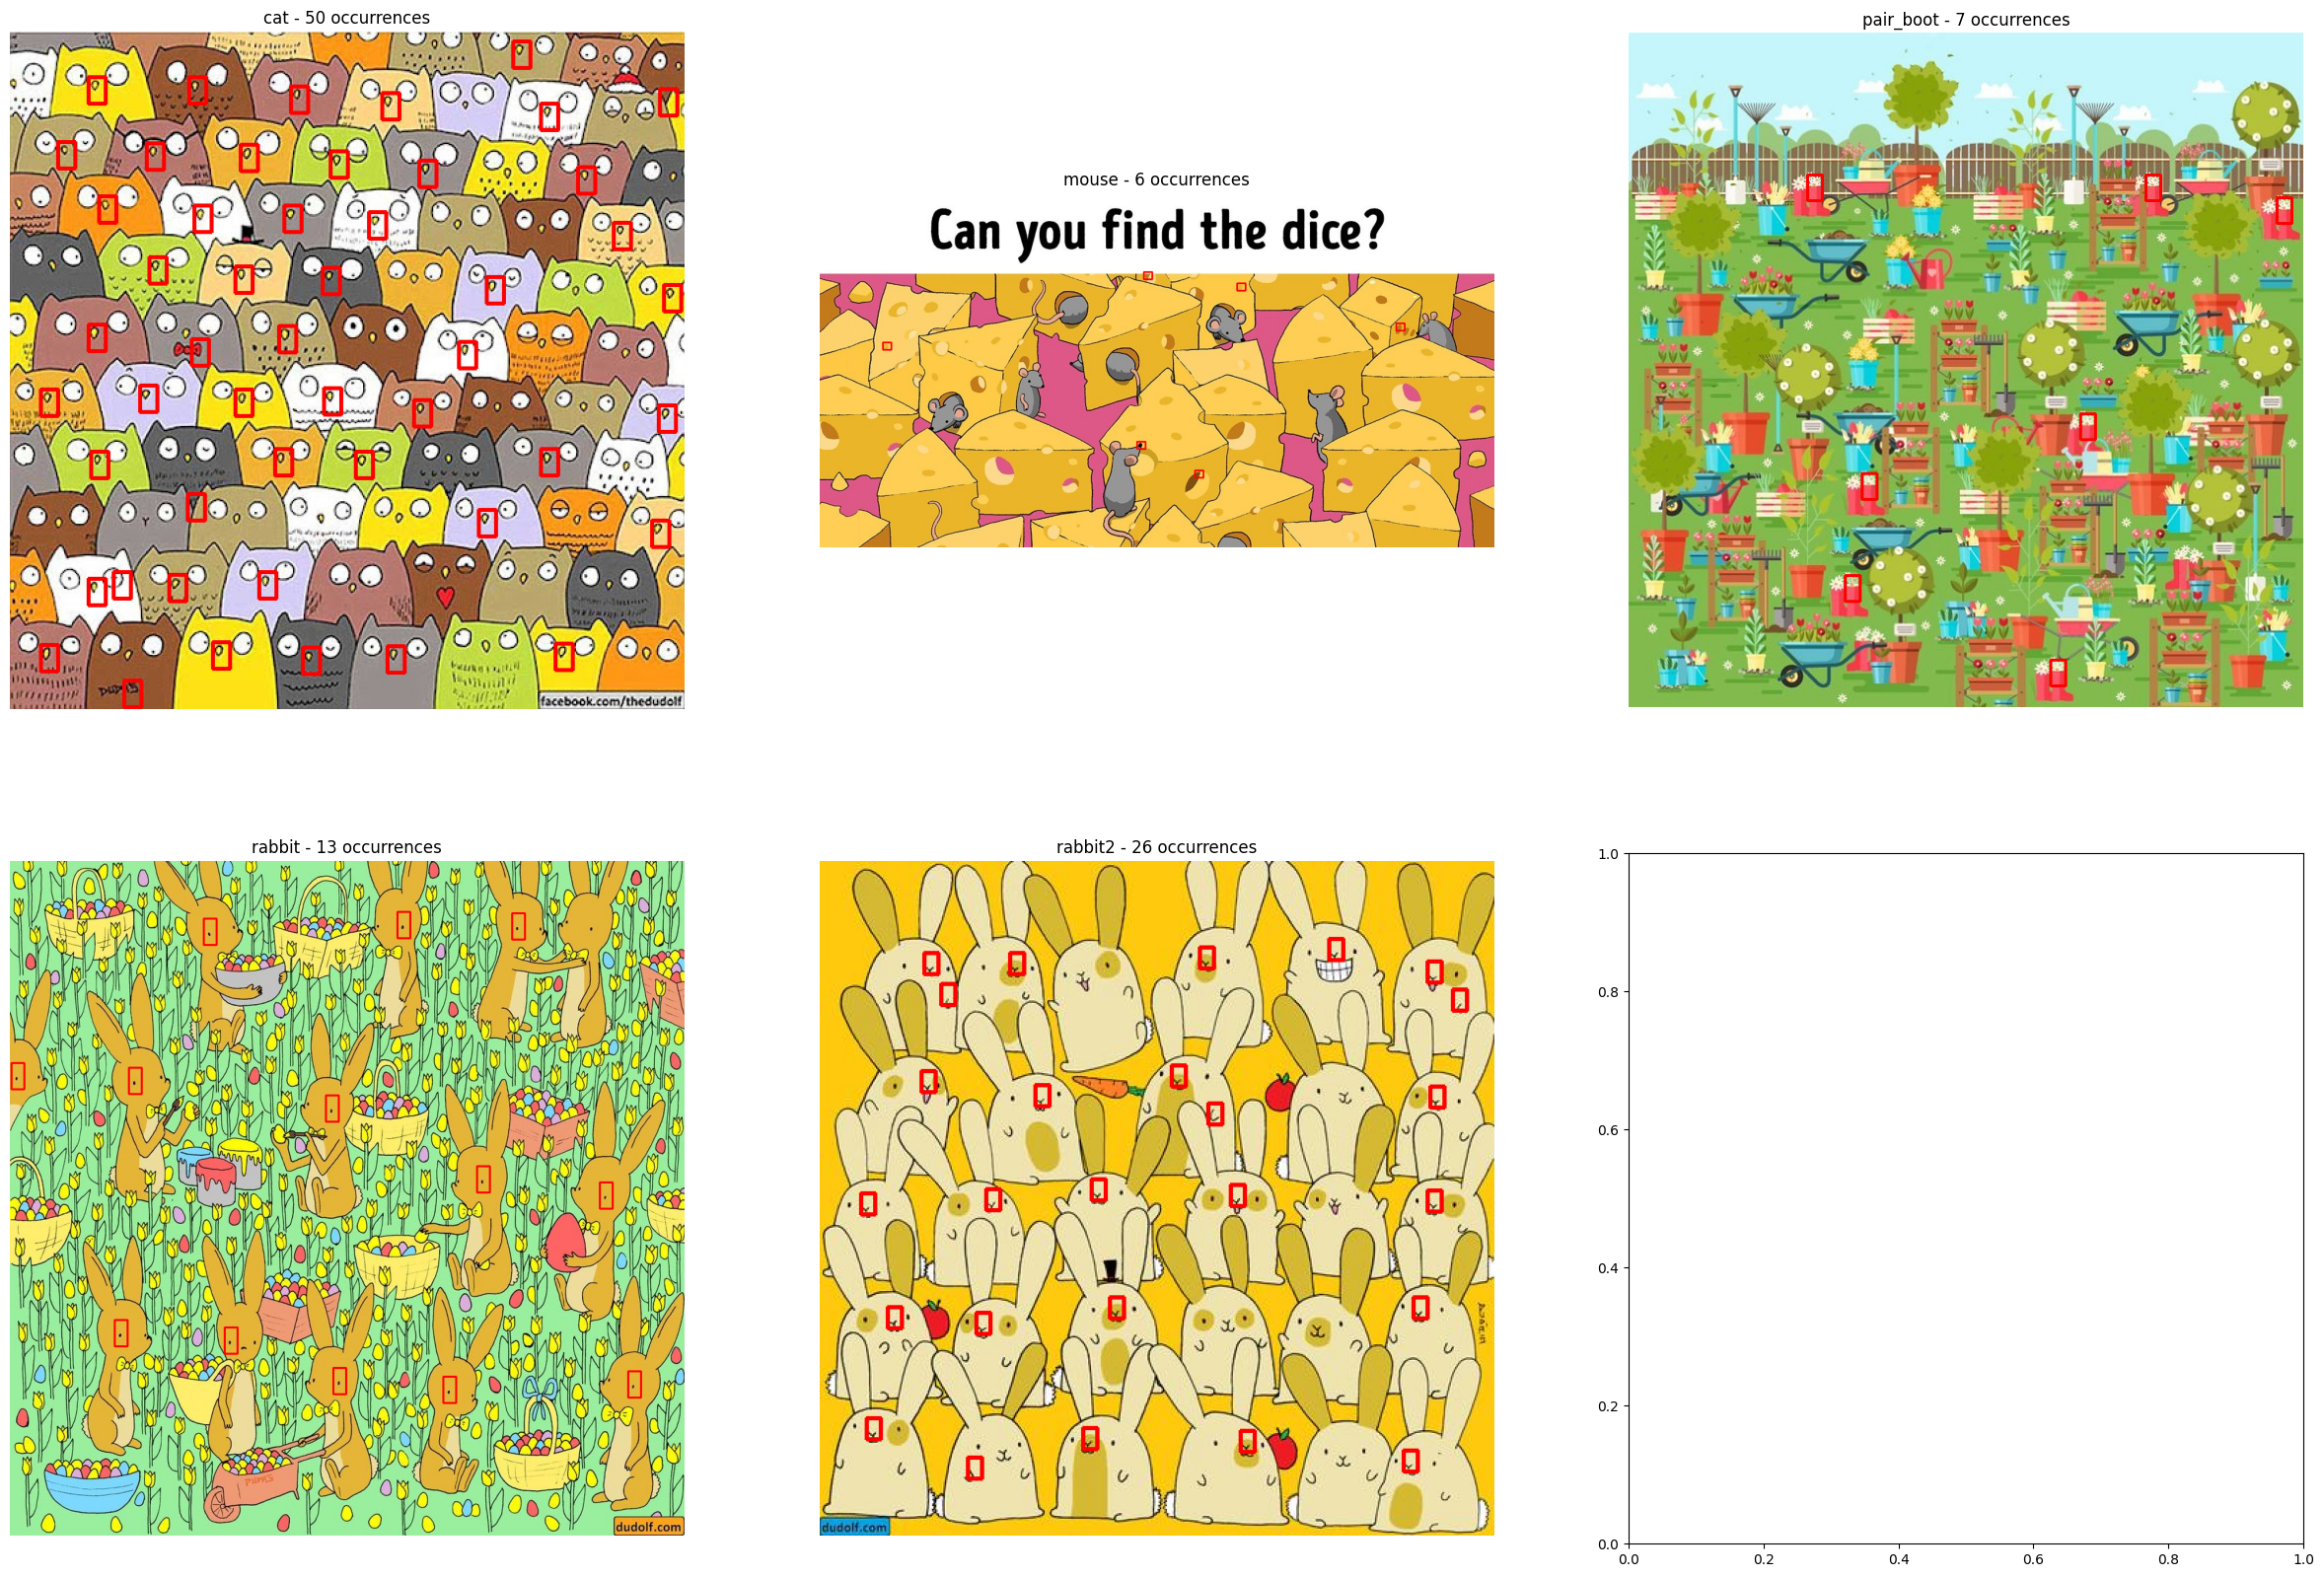

In [44]:
img_names = ['cat', 'mouse', 'pair_boot', 'rabbit', 'rabbit2']
thresholds = [0.45, 0.75, 0.85, 0.5, 0.6]
plt.subplots(2, 3, figsize=(30, 20))

for img_name, threshold in zip(img_names, thresholds):
    occurrences, img_bgr = count_occurrences(img_name, threshold)
    plt.subplot(2, 3, img_names.index(img_name) + 1)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.title(f'{img_name} - {occurrences} occurrences')
    plt.axis('off')
    
plt.show()